In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
import spacy

In [10]:
df = pd.read_csv("training_set_rel3.csv")

In [11]:
df.shape

(12978, 28)

In [12]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12978.000000,12978.000000,12977.000000,12977.000000,128.000000,12977.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.432809,4.179458,4.126840,4.137089,37.828125,6.799723,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6308.588616,2.136749,4.212537,4.264320,5.240829,8.970558,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4439.250000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10045.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15680.750000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [13]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.tail()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
12977,21633,8,Many people believe that laughter can improve...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.isna().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
domain1_score         1
rater1_domain2    11178
rater2_domain2    11178
domain2_score     11178
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
dtype: int64

In [16]:
df1 = df[df.essay_set == 1]
df1

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779,1784,1,Do a adults and kids spend to much time on the...,3.0,4.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1780,1785,1,My opinion is that people should have computer...,4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1781,1786,1,"Dear readers, I think that its good and bad to...",1.0,1.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df1.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1783.000000,1783.0,1783.000000,1783.000000,0.0,1783.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,894.310151,1.0,4.260796,4.267527,NaN,8.528323,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,516.143993,0.0,0.842119,0.816287,NaN,1.538565,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.0,1.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,448.500000,1.0,4.000000,4.000000,NaN,8.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,894.000000,1.0,4.000000,4.000000,NaN,8.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1341.500000,1.0,5.000000,5.000000,NaN,10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1787.000000,1.0,6.000000,6.000000,NaN,12.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df1 = df1.iloc[:, 0:7]
df1

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0
...,...,...,...,...,...,...,...
1778,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4.0,4.0,NaN,8.0
1779,1784,1,Do a adults and kids spend to much time on the...,3.0,4.0,NaN,7.0
1780,1785,1,My opinion is that people should have computer...,4.0,4.0,NaN,8.0
1781,1786,1,"Dear readers, I think that its good and bad to...",1.0,1.0,NaN,2.0


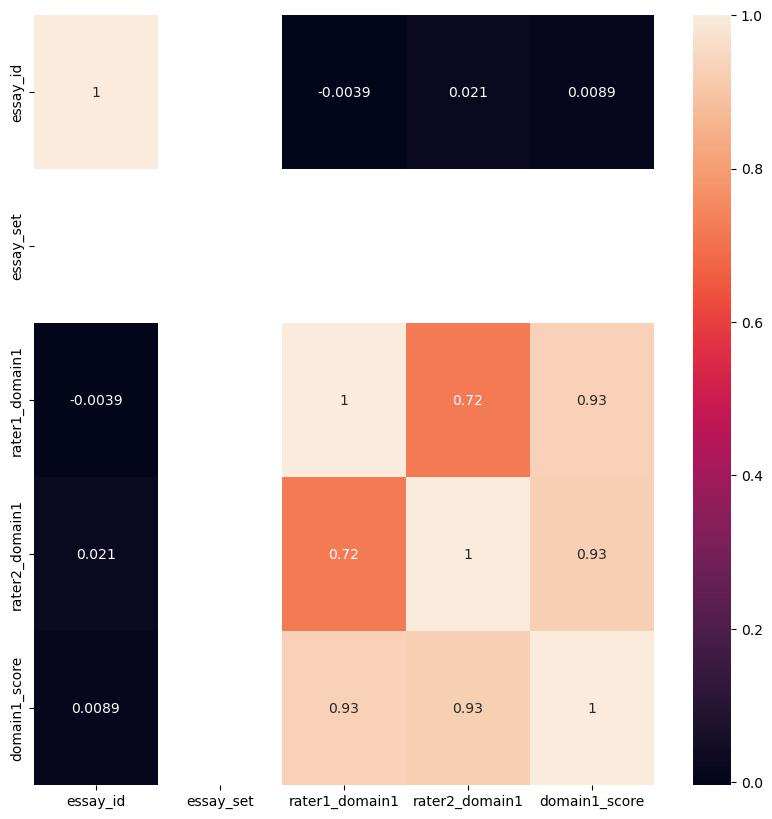

In [19]:
df1_test = df1
df1_test.drop(columns=['essay', 'rater3_domain1'])
plt.figure(figsize=(10,10))
sns.heatmap((df1_test.drop(columns=['essay', 'rater3_domain1'])).corr(),annot=True)
plt.show()


In [20]:
texts = df1['essay'].tolist()
texts_ = df1['essay']

In [27]:
# Charger le modèle linguistique
nlp = spacy.load("en_core_web_sm")

# Texte à analyser
text = texts[0]

# Traiter le texte avec Spacy
doc = nlp(text)

# Calculer la longueur du texte (nombre de tokens)
nombre_tokens = len(doc)

# Calculer la longueur moyenne des phrases
longueur_phrases = [len(sent) for sent in doc.sents]
longueur_moyenne_phrase = sum(longueur_phrases) / len(longueur_phrases) if longueur_phrases else 0

# Compter le nombre de mots sophistiqués (par exemple, mots de plus de 6 caractères)
nombre_mots_sophistiques = sum(1 for token in doc if len(token.text) > 6)

# Évaluation du niveau du texte
niveau = "Élevé" if longueur_moyenne_phrase > 20 and nombre_mots_sophistiques > 10 else "Bas"

# Affichage des résultats
print(f"Nombre de tokens : {nombre_tokens}")
print(f"Longueur moyenne des phrases : {longueur_moyenne_phrase}")
print(f"Nombre de mots sophistiqués : {nombre_mots_sophistiques}")
print(f"Niveau du texte : {niveau}")


Nombre de tokens : 395
Longueur moyenne des phrases : 24.6875
Nombre de mots sophistiqués : 59
Niveau du texte : Élevé


In [23]:
nlp = spacy.load("en_core_web_sm")
def get_token_nbr(x):
    doc = nlp(x)
    return(len(doc))

def get_mean_len(x):
    doc = nlp(x)
    longueur_phrases = [len(sent) for sent in doc.sents]
    longueur_moyenne_phrase = sum(longueur_phrases) / len(longueur_phrases) if longueur_phrases else 0
    return (longueur_moyenne_phrase)

def get_sophisticated_nbr(x):
    doc = nlp(x)
    nombre_mots_sophistiques = sum(1 for token in doc if len(token.text) > 6)
    return(nombre_mots_sophistiques)

def level_of_language(x):
    doc = nlp(x)
    longueur_phrases = [len(sent) for sent in doc.sents]
    longueur_moyenne_phrase = sum(longueur_phrases) / len(longueur_phrases) if longueur_phrases else 0
    nombre_mots_sophistiques = sum(1 for token in doc if len(token.text) > 6)
    niveau = "Élevé" if longueur_moyenne_phrase > 20 and nombre_mots_sophistiques > 10 else "Bas"
    return(niveau)

#print(get_token_nbr("ijij ijr  , vri"))

df1_test['token_nbr'] = df1_test['essay'].apply(get_token_nbr)
df1_test['mean_len'] = df1_test['essay'].apply(get_mean_len)
df1_test['sophisticated_nbr'] = df1_test['essay'].apply(get_sophisticated_nbr)
df1_test['level_of_language'] = df1_test['essay'].apply(level_of_language)
df1_test

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,token_nbr,mean_len,sophisticated_nbr,level_of_language
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,395,24.687500,59,Élevé
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,456,22.800000,81,Élevé
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,306,20.400000,53,Élevé
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,576,21.333333,131,Élevé
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,518,17.266667,87,Bas
...,...,...,...,...,...,...,...,...,...,...,...
1778,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4.0,4.0,NaN,8.0,546,26.000000,59,Élevé
1779,1784,1,Do a adults and kids spend to much time on the...,3.0,4.0,NaN,7.0,236,11.238095,33,Bas
1780,1785,1,My opinion is that people should have computer...,4.0,4.0,NaN,8.0,314,17.444444,51,Bas
1781,1786,1,"Dear readers, I think that its good and bad to...",1.0,1.0,NaN,2.0,16,16.000000,2,Bas


In [74]:
import nltk
#from nltk.corpus import words

# Liste des mots anglais du corpus de NLTK
#liste_mots_anglais = set()
nltk.download('gutenberg')
#nltk.corpus.reader.wordlist.WordListCorpusReader.words
# Calcul des mots sophistiqués dans l'essai
#mots_essai = nltk.word_tokenize(df1_test['essay'][0])
#mots_sophistiques = [mot for mot in mots_essai if mot.lower() not in liste_mots_anglais]

#print("Mots sophistiqués :", mots_sophistiques)
#df1_test

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True